In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import iris dataset
df=pd.read_excel('iris.xls')

In [3]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#checking for null values
df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
for col in ['SL', 'SW','PL']:
    df[col] = df[col].fillna(df[col].median())

In [8]:
df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [9]:
print(df["Classification"].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64


<AxesSubplot:>

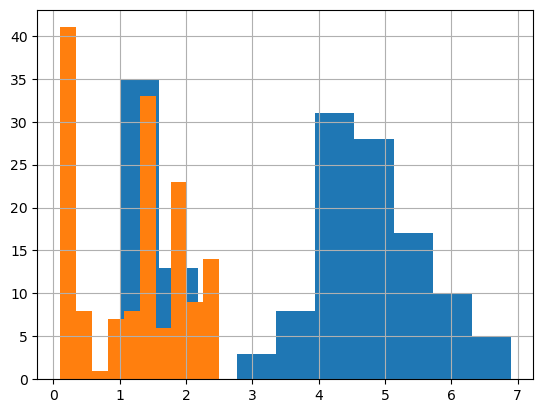

In [10]:
#visualize the data in the form of graphs
df['PL'].hist()
df['PW'].hist()

<AxesSubplot:>

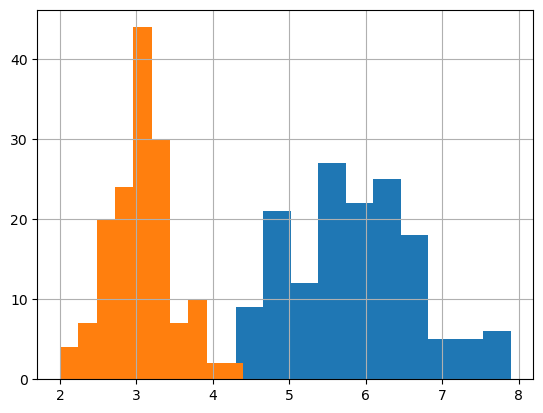

In [11]:
df['SL'].hist()
df['SW'].hist()

In [12]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Classification'] = le.fit_transform(df['Classification'])
df.head(100)
 

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,3.0,3.0,1.1,1


In [13]:
# Separate features and target  
y=df['Classification']
x=df.drop(['Classification'],axis=1)

In [14]:
# Splitting the data to train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()


In [28]:
model = clf.fit(x_train,y_train)

C:\Users\mayat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
y_pred=model.predict(x_test)

In [30]:
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [32]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [33]:
print('Accuracy=',accuracy_score(y_test,y_pred)*100)

Accuracy= 100.0


In [34]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: Classification, dtype: int32

# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)


for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model = classifier.fit(x_train,y_train)
    y_pred =  model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)


C:\Users\mayat\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mayat\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [36]:
metric_k

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

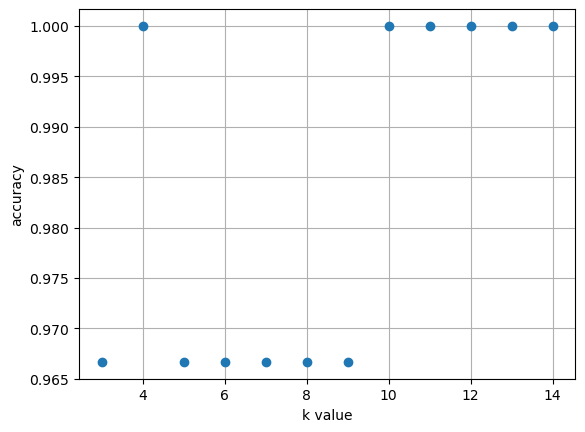

In [37]:
plt.plot(neighbors,metric_k,'o')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [38]:
classifier = KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2)
model = classifier.fit(x_train,y_train)
y_pred =  model.predict(x_test)
acc = accuracy_score(y_test,y_pred)
    

C:\Users\mayat\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [39]:
print('Accuracy=',accuracy_score(y_test,y_pred)*100)


Accuracy= 100.0


# SVM


In [40]:
from sklearn.svm import SVC  
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train) 


SVC(kernel='linear')

In [41]:
y_pred_svm = svmclf.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [43]:
print('Accuracy=',accuracy_score(y_test,y_pred_svm)*100)

Accuracy= 100.0


In [44]:
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [45]:
from sklearn.svm import SVC  
svmclf=SVC(kernel='rbf')
svmclf.fit(x_train,y_train) 


SVC()

In [46]:
y_pred_svm = svmclf.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [48]:
print('Accuracy=',accuracy_score(y_test,y_pred_svm)*100)

Accuracy= 100.0


In [49]:
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [50]:
from sklearn.svm import SVC  
svmclf=SVC(kernel='poly')
svmclf.fit(x_train,y_train)

SVC(kernel='poly')

In [51]:
y_pred_svm = svmclf.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [63]:
print('Accuracy=',accuracy_score(y_test,y_pred_svm)*100)

Accuracy= 96.66666666666667


In [54]:
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

# Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier 
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
y_pred_dt = dt_clf.predict(x_test)

In [57]:
print('Accuracy=',accuracy_score(y_test,y_pred_dt)*100)

Accuracy= 100.0


In [58]:
confusion_matrix(y_test,y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [60]:
y_pred_rf = rf_clf.predict(x_test)

In [61]:
print('Accuracy=',accuracy_score(y_test,y_pred_rf)*100)

Accuracy= 100.0


In [62]:
confusion_matrix(y_test,y_pred_rf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# Conclusion

All these models have shown an accuracy of 100% except SVM , which shows that the model we built is very accurate.